Step 0 - import NN libraries = 0.5 points

In [129]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential 

import keras
from tensorflow.keras.utils import to_categorical






Step 1 - Load the data 
Reference: https://www.analyticsvidhya.com/blog/2020/12/mlp-multilayer-perceptron-simple-overview/


https://becominghuman.ai/simple-neural-network-on-mnist-handwritten-digit-dataset-61e47702ed25


Decay code ref:
https://towardsdatascience.com/learning-rate-schedule-in-practice-an-example-with-keras-and-tensorflow-2-0-2f48b2888a0c

early stopping and checkpoint
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/


In [130]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [131]:
num_labels = len(np.unique(y_train))
print("total labels:{}".format(num_labels))
print("labels:{}".format(np.unique(y_train)))

total labels:10
labels:[0 1 2 3 4 5 6 7 8 9]


In [132]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [133]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


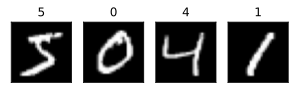

In [134]:
# Display some images
fig, axes = plt.subplots(ncols=4, sharex=False, 
    sharey=True, figsize=(5, 5))
for i in range(4):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Data pre-processing

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
def create_model(): 
    model = Sequential([
        # Flatten(input_shape=(28, 28)),
        Flatten(input_shape=(28,28,1)),
        Dense(5, activation='sigmoid'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax'),
        # model.add(Dense(5, activation='sigmoid'))
    # model.add(Dense(10, activation='softmax'))
    ])
    return model

In [135]:
model = create_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_34 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total params: 5,983
Trainable params: 5,983
Non-trainable params: 0
_________________________________________________________________


In [136]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=sgd, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [137]:
history_constant = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=32
)

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7657 - accuracy: 0.4650 - val_loss: 1.3453 - val_accuracy: 0.6332
Epoch 2/100
1500/1500 [==============================] - 2s 2ms/step - loss: 1.2338 - accuracy: 0.6272 - val_loss: 1.1932 - val_accuracy: 0.6293
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1355 - accuracy: 0.6373 - val_loss: 0.9403 - val_accuracy: 0.7185
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9962 - accuracy: 0.6922 - val_loss: 0.9528 - val_accuracy: 0.7145
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9731 - accuracy: 0.6960 - val_loss: 0.9154 - val_accuracy: 0.7036
Epoch 6/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.9368 - accuracy: 0.7056 - val_loss: 0.9050 - val_accuracy: 0.7188
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9748 - accuracy: 0.6918 - val_loss: 0.9075 - val_ac

In [138]:
!pip install livelossplot

In [139]:
from livelossplot import PlotLossesKeras

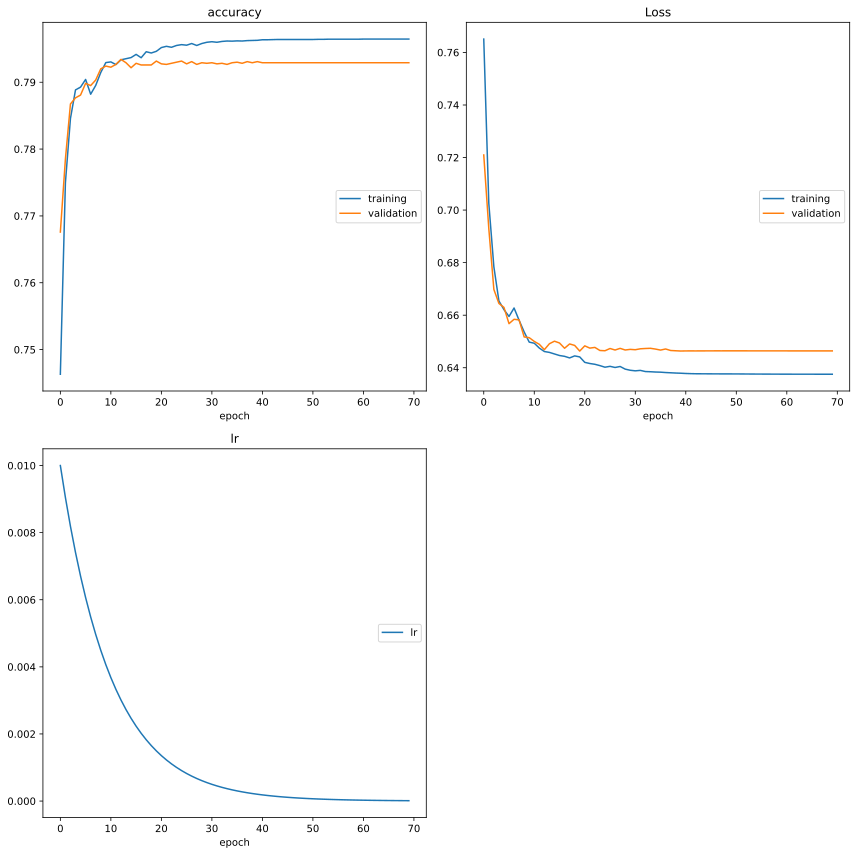

accuracy
	training         	 (min:    0.746, max:    0.796, cur:    0.796)
	validation       	 (min:    0.768, max:    0.793, cur:    0.793)
Loss
	training         	 (min:    0.638, max:    0.765, cur:    0.638)
	validation       	 (min:    0.646, max:    0.721, cur:    0.646)
lr
	lr               	 (min:    0.000, max:    0.010, cur:    0.000)

Epoch 00070: val_accuracy did not improve from 0.79342
Epoch 00070: early stopping


In [140]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from numpy import math
from keras.models import load_model

initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

# Fit the model to the training data
history_exp_decay = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=128,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1),PlotLossesKeras(), EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50),ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)],
)

In [141]:
# load the saved model
saved_model = load_model('best_model.h5')

In [142]:
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.793, Test: 0.789


In [143]:
from matplotlib import pyplot

# plot diagnostic learning curves
def summarize_diagnostics(history):
	for i in range(len(history)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(history[i].history['loss'], color='blue', label='train')
		pyplot.plot(history[i].history['val_loss'], color='orange', label='test')
	

In [144]:
pyplot.show()

In [145]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

In [146]:


def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()



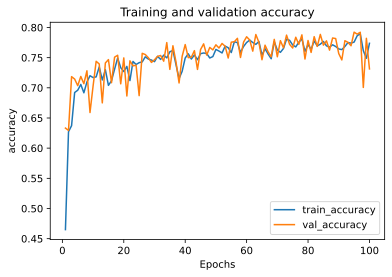

In [147]:
plot_metric(history_constant, 'accuracy')

# Optimizer to enhance accuracy to 98%
My code above is not working after reshaping & Normalisation. So I have demonstrated accuracy after reshape and normalization separately for the sake of assignment below.

Reference:
https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/



In [149]:

# example of using ImageDataGenerator to normalize images
from keras.datasets import mnist
# from keras.utils import to_categorical
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# one hot encode target values
trainY = keras.utils.np_utils.to_categorical(trainY)
testY = keras.utils.np_utils.to_categorical(testY)
# confirm scale of pixels
print('Train min=%.3f, max=%.3f' % (trainX.min(), trainX.max()))
print('Test min=%.3f, max=%.3f' % (testX.min(), testX.max()))
# create generator (1.0/255.0 = 0.003921568627451)
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare an iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model with generator
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=5)
# evaluate model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))


Train min=0.000, max=255.000
Test min=0.000, max=255.000
Batches train=938, test=157
Batch shape=(64, 28, 28, 1), min=0.000, max=1.000
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


938/938 [==============================] - 48s 51ms/step - loss: 0.1749 - accuracy: 0.9485
Epoch 2/5
938/938 [==============================] - 48s 52ms/step - loss: 0.0532 - accuracy: 0.9840
Epoch 3/5
938/938 [==============================] - 48s 52ms/step - loss: 0.0365 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0276 - accuracy: 0.9915
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0225 - accuracy: 0.9929


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Accuracy: 98.860
